In [39]:
import numpy as np
class LinearRegression():
    def __init__(self) -> None:

        self.weight = None

        pass
    def fit(self, X, Y):
        """ 
        ### Input
        X: (n, d)
        Y: (n, )

        ### Output:
        W: (d, )


        W = (X^TX)^{-1} X^TY
        """

        ### Adding bias
        bias = np.ones((X.shape[0])).reshape(X.shape[0], 1)
        X = np.hstack((bias, X))

        self.weight = np.linalg.inv(X.T @ X) @ X.T @ Y


        
    def predict(self, X):
        bias = np.ones((X.shape[0])).reshape(X.shape[0], 1)
        X = np.hstack((bias, X))
        return X @ self.weight



# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

# Fit linear regression model
lr = LinearRegression()
lr.fit(X, y)
print(lr.weight) # [3. 1. 2.]

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print(y_pred)


        

[3. 1. 2.]
[35. 44.]


[1.99964292 0.65345474]
[2.65309766 3.3065524  3.96000714 4.61346188 5.26691662]


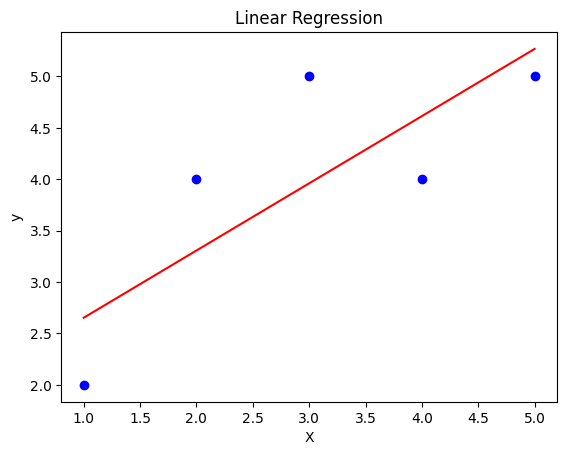

In [53]:
import numpy as np
class LinearRegressionGD():
    def __init__(self, reg=0.1) -> None:
        self.weight = None
        self.reg = reg

        pass
    def fit(self, X, Y, lr, steps):
        """ 
        ### Input
        X: (n, d)
        Y: (n, )

        ### Output:
        W: (d, )
        """

        


        ### Adding bias
        bias = np.ones((X.shape[0])).reshape(X.shape[0], 1)
        
        X = np.hstack((bias, X))

        self.weight = np.zeros((X.shape[1]))


        for i in range(steps):
            self.weight -= 2 * lr * (X.T @ (X@self.weight - Y) + self.reg * self.weight)
        
    def predict(self, X):
        bias = np.ones((X.shape[0])).reshape(X.shape[0], 1)
        X = np.hstack((bias, X))
        return X @ self.weight



X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegressionGD(reg=0.1)
lr.fit(X, y, lr=0.01, steps=10000)
print(lr.weight)  # Output: [ 1.99964292  0.65345474 ]
y_pred = lr.predict(X)
print(y_pred)  # # Output: [2.65309766, 3.3065524, 3.96000714, 4.61346188, 5.26691662]



import matplotlib.pyplot as plt 

# Plot the data and the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()